Creating a (pseudo)-random population distribution.
Enter a population size (between 1 and 10^6): 10000

The population mean is: 5.083
The population standard deviation is: 1014.512
Here's what the population distribution looks like.


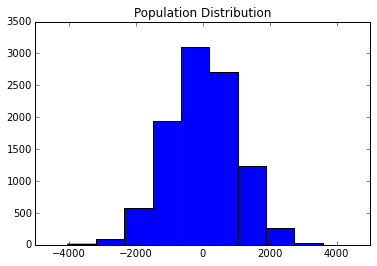

Enter the sample size (drawn with replacement from the population, between 1 and 10^6): 100
Enter the requisite confidence interval alpha to evaluate as a decimal, between 0 and 0.999999: 0.8
Enter the number of times to repeat the experiment (between 1 and 10^6): 100


The mean of the sample means is: 8.914
Here's what the sample mean distribution looks like.


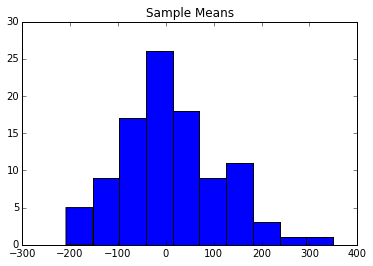

2.a/Challenge.1) After drawing 100 samples of size 100, the approx. standard error of the sampling distribution are:
--------------------------------------------  -------
Approximation from sample mean distribution   107.08
Average of sample standard errors             103.266
Population std deviation / sqrt(sample size)  101.451
--------------------------------------------  -------

2.b) In these samples, the 80.00% confidence interval captured the population mean 77 times, which is 77.00% of the procedures

Challenge.3.i) The minimal interval (max lower, min upper) is (211.348, -76.807).
It failed to capture the population mean (5.083), and it is empty.

Chanllenge.3.ii) The maximal interval (min lower, max upper) is (-342.243, 486.948).
It captured the population mean (5.083).
Perform sampling procedure again? Note that if no, then the population distribution will be lost.
y / n: n


In [13]:
# Code for the Sampling / RTTM / Confidence Intervals Assignment
# Adapted from CLT.py provded for FA 2.03.1


%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import re
from tqdm import tqdm
from tabulate import tabulate


DECIMAL_NUMBER_PATTERN = '^[\d\.]+$'


def create_uniform_population(size, size_multiplier=1000):
    return size_multiplier * np.random.random_sample((size, ))


def create_beta_population(size, size_multiplier=1000, a=0.5, b=0.5):
    return size_multiplier * np.random.beta(a, b, (size, ))


def create_normal_population(size, mean=0, std_dev=1, size_multiplier=1000):
    return size_multiplier * np.random.normal(mean, std_dev, size)
    

def graph_distribution(distribution, name):
    plt.hist(distribution)
    plt.title(name)
    plt.show()

    
def sample_procedure(population, sample_size, alpha):
    population_mean = np.mean(population)
    
    sample_repeats = read_number_from_user("Enter the number of times to repeat the experiment (between 1 and 10^6): ", int, 1, 10**6)
    sample_means = []
    sample_std_errors = []
    ci_capture_count = 0
    
    min_lower_bound = None
    max_lower_bound = None
    min_upper_bound = None
    max_upper_bound = None
    
    for _ in tqdm(xrange(sample_repeats)):
        sample = np.random.choice(population, (sample_size, ))
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
        
        sample_std_error = np.std(sample, ddof=1) / (sample_size ** 0.5) # ddof=1 applies Bessel's correction
        sample_std_errors.append(sample_std_error)
        
        lower_bound, upper_bound = stats.t.interval(alpha, sample_size - 1, sample_mean, sample_std_error)
        if lower_bound <= population_mean <= upper_bound:
            ci_capture_count += 1
            
        if not min_lower_bound or lower_bound < min_lower_bound:
            min_lower_bound = lower_bound
        if not max_lower_bound or lower_bound > max_lower_bound:
            max_lower_bound = lower_bound
        
        if not min_upper_bound or upper_bound < min_upper_bound:
            min_upper_bound = upper_bound
        if not max_upper_bound or upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
    
    print "The mean of the sample means is: {mean:.3f}".format(mean=np.mean(sample_means))
    print "Here's what the sample mean distribution looks like."
    graph_distribution(sample_means, 'Sample Means')
    
    se_mean_output = "2.a/Challenge.1) After drawing {repeats} samples of size {sample_size}, the approx. standard error of the sampling distribution are:"
    se_mean_approximations = [('Approximation from sample mean distribution', np.std(sample_means, ddof=1)), # correcting as we're approximating from a sample
                              ('Average of sample standard errors', np.mean(sample_std_errors)),
                              ('Population std deviation / sqrt(sample size)', np.std(population) / (sample_size ** 0.5))]
    print se_mean_output.format(repeats=sample_repeats, sample_size=sample_size)
    print tabulate(se_mean_approximations)
    
    ci_output = "\n2.b) In these samples, the {alpha_percent:.2f}% confidence interval captured " +\
                "the population mean {capture_count} times, which is {capture_percent:.2f}% of the procedures"
    print ci_output.format(alpha_percent=alpha*100, capture_count=ci_capture_count, capture_percent=float(ci_capture_count)*100/sample_repeats)
    
    challenge_output = '\nChallenge.3.i) The minimal interval (max lower, min upper) is ({max_lower:.3f}, {min_upper:.3f}).\n' +\
                    'It {capture} the population mean ({pop_mean:.3f}), and it is {empty}.'
    capture = (max_lower_bound <= population_mean <= min_upper_bound) and 'captured' or 'failed to capture'
    empty = (max_lower_bound < min_upper_bound) and 'not empty, and has a range of {range}'.format(range=min_upper_bound - max_lower_bound) or 'empty'
    print challenge_output.format(max_lower=max_lower_bound, min_upper=min_upper_bound, capture=capture, empty=empty, pop_mean = population_mean)
    
    more_challenge = '\nChanllenge.3.ii) The maximal interval (min lower, max upper) is ({min_lower:.3f}, {max_upper:.3f}).\n' +\
                    'It {capture} the population mean ({pop_mean:.3f}).'
    capture = (min_lower_bound <= population_mean <= max_upper_bound) and 'captured' or 'failed to capture'
    print more_challenge.format(min_lower=min_lower_bound, max_upper=max_upper_bound, capture=capture, pop_mean=population_mean)
    
    
#####################################


def read_number_from_user(prompt, type_func, min_value, max_value):
    value = min_value - 1
    while not (min_value <= value <= max_value):
        raw_value = raw_input(prompt)
        if re.match(DECIMAL_NUMBER_PATTERN, raw_value):
            value = type_func(raw_value)
        
    return value


def read_letter_from_user(prompt, options):
    letter = ''
    while not letter in options:
        letter = raw_input(prompt).strip().lower()
        
    return letter


def main():
    print "Creating a (pseudo)-random population distribution."
    population_size = read_number_from_user("Enter a population size (between 1 and 10^6): ", int, 1, 10**6)
    population = create_normal_population(population_size)
#     population = create_uniform_population(population_size)
#     population = create_beta_population(population_size)

    print
    print "The population mean is: {mean:.3f}".format(mean=np.mean(population))
    print "The population standard deviation is: {stddev:.3f}".format(stddev=np.std(population)) 
    print "Here's what the population distribution looks like."
    graph_distribution(population, 'Population Distribution')

    sample_size = read_number_from_user("Enter the sample size (drawn with replacement from the population, between 1 and 10^6): ", int, 1, 10**6)
    alpha = read_number_from_user("Enter the requisite confidence interval alpha to evaluate as a decimal, between 0 and 0.999999: ", float, 0, 0.999999)
    continue_sampling = True

    while continue_sampling:
        sample_procedure(population, sample_size, alpha)
        print "Perform sampling procedure again? Note that if no, then the population distribution will be lost."
        decision = read_letter_from_user("y / n: ", ('y', 'n'))
        continue_sampling = (decision == 'y')
        
main()